In [380]:
import numpy as np
import matplotlib.pyplot as plt

In [449]:
# Let's the target function be a random linear function of my choice
# 0.7x0 + 0.8x1 + 0.4x2, where x0 = 1

target_weights = np.array([0.7, 0.8, 0.4])

# This function will be used to plot the target function
def target_function(x1):
    x2 = -(target_weights[0]*1 + target_weights[1]*x1)/target_weights[2]
    return x2

# This function will be used to calculate labels, and distinguish positive and negative points
def target_function_activate(X):
    if np.dot(target_weights, X) < 0:
        return -1
    else:
        return 1

### Task 1
Generate a data set of size 20 as directed by Exercise 1.4 of LFD, and plot the examples
{(xn , yn )} as well as the target function f on a plane. Be sure to mark the examples from
different classes differently, and add labels to the axes of the plot.

In [450]:
# First data set with size 20

# Generate a random data set of size 20
X1 = np.random.uniform(low=-1.0, high=1.0, size=(20,3))
for x in X1:
    x[0] = 1.0

# Distinguish between positive and negative examples, and identify labels
X1pos, X1neg, Y1pos, Y1neg, labels1 = [],[],[],[],[]
for x in X1:
    if target_function_activate(x) == 1:
        X1pos.append(x[1])
        Y1pos.append(x[2])
    else:
        X1neg.append(x[1])
        Y1neg.append(x[2])
    labels1.append(target_function_activate(x))

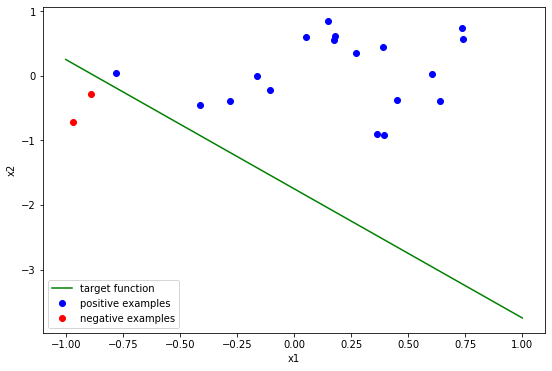

In [451]:
plt.rcParams["figure.figsize"] = (9,6)

# Plot the target function
X0 = [-1.0, 1.0]
Y0 = [target_function(i) for i in X0]
plt.plot(X0, Y0, 'g', label = 'target function')

# Plot the first data set's points 
plt.plot(X1pos, Y1pos, 'bo', label = 'positive examples')
plt.plot(X1neg, Y1neg, 'ro', label = 'negative examples')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Task 2 
Run Perceptron Learning Algorithm (PLA) on the data set above. Report the number
of updates that PLA takes before converging. Plot the examples {(x n , y n )}, the target
function f , and the final hypothesis g in the same figure. Comment on whether f is
close to g.

In [452]:
# Initialize weights as a random small numbers

def initialize_weights():
    weights = np.random.uniform(low=0.1, high=0.5, size=(3,))
    return weights

In [453]:
# PLA algorithm

def PLA(X, W, Y, epoch_num = 100):
    # X is an input data set
    # Y is labels for corresponding X
    # W is the weights
    # epoch_num is a number of iterations
    
    number_of_updates = 0
    
    for epoch in range(epoch_num):
        was_updated = False
        for i, x in enumerate(X):
            z = np.dot(W, x)
            if z * Y[i] <= 0:
                was_updated = True
                number_of_updates += 1
                W = W + Y[i]*x
        if not was_updated:
            break            
    return W, number_of_updates
    

In [457]:
# Initialize weights for the first data set
W1 = initialize_weights()

# Run PLA on the first data set
W1, number_of_updates1 = PLA(X1, W1, labels1)

print("Weights = ", W1)
print("Number of updates = ", number_of_updates1)

Weights =  [0.40317637 0.37546384 0.26247578]
Number of updates =  0


In [458]:
# This function will be used to plot the hypothesis function
def hypothesis_function(x1, W):
    x2 = -(W[0] + W[1]*x1)/W[2]
    return x2

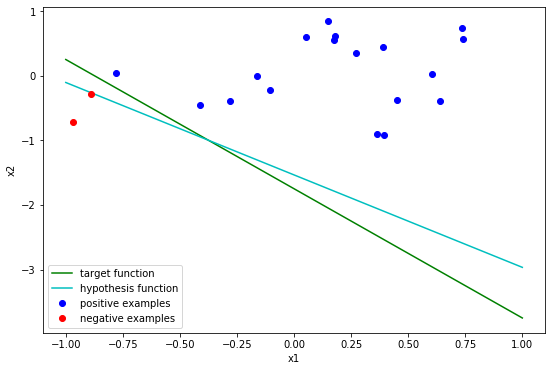

In [459]:
plt.rcParams["figure.figsize"] = (9,6)

# Plot the target function
X0 = [-1.0, 1.0]
Y0 = [target_function(i) for i in X0]
plt.plot(X0, Y0, 'g', label = 'target function')

# Plot the hypothesis function
Y_hypothesis1 =[hypothesis_function(i, W1) for i in X0]
plt.plot(X0, Y_hypothesis1, 'c', label = 'hypothesis function')

# Plot the first data set's points 
plt.plot(X1pos, Y1pos, 'bo', label = 'positive examples')
plt.plot(X1neg, Y1neg, 'ro', label = 'negative examples')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Task 3
Repeat everything in (2) with another randomly generated data set of size 20. Compare
your results with (2).

In [469]:
# Second data set with size 20

X2 = np.random.uniform(low=-1.0, high=1.0, size=(20,3))
for x in X2:
    x[0] = 1.0
    
X2pos, X2neg, Y2pos, Y2neg, labels2 = [],[],[],[],[]
for x in X2:
    if target_function_activate(x) == 1:
        X2pos.append(x[1])
        Y2pos.append(x[2])
    else:
        X2neg.append(x[1])
        Y2neg.append(x[2])
    labels2.append(target_function_activate(x))

In [470]:
W2 = initialize_weights()
W2, number_of_updates2 = PLA(X2, W2, labels2)
print("Weights = ", W2)
print("Number of updates = ", number_of_updates2)

Weights =  [3.45741571 3.65052074 1.34537667]
Number of updates =  41


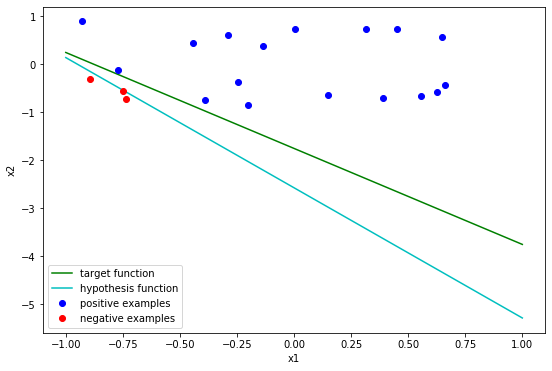

In [471]:
plt.rcParams["figure.figsize"] = (9,6)

# Plot the target function
X0 = [-1.0, 1.0]
Y0 = [target_function(i) for i in X0]
plt.plot(X0, Y0, 'g', label = 'target function')

# Plot the hypothesis function
Y_hypothesis2 = [hypothesis_function(i, W2) for i in X0]
plt.plot(X0, Y_hypothesis2, 'c', label = 'hypothesis function')

# Plot the second data set's points 
plt.plot(X2pos, Y2pos, 'bo', label = 'positive examples')
plt.plot(X2neg, Y2neg, 'ro', label = 'negative examples')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Task 4
Repeat everything in (2) with another randomly generated data set of size 100. Compare
your results with (2).

In [472]:
# Third data set with size 100

X3 = np.random.uniform(low=-1.0, high=1.0, size=(100,3))
for x in X3:
    x[0] = 1.0
    
X3pos, X3neg, Y3pos, Y3neg, labels3 = [],[],[],[],[]
for x in X3:
    if target_function_activate(x) == 1:
        X3pos.append(x[1])
        Y3pos.append(x[2])
    else:
        X3neg.append(x[1])
        Y3neg.append(x[2])
    labels3.append(target_function_activate(x))

In [473]:
W3 = initialize_weights()
W3, number_of_updates3 = PLA(X3, W3, labels3)
print("Weights = ", W3)
print("Number of updates = ", number_of_updates3)

Weights =  [2.20500595 2.243029   1.542174  ]
Number of updates =  12


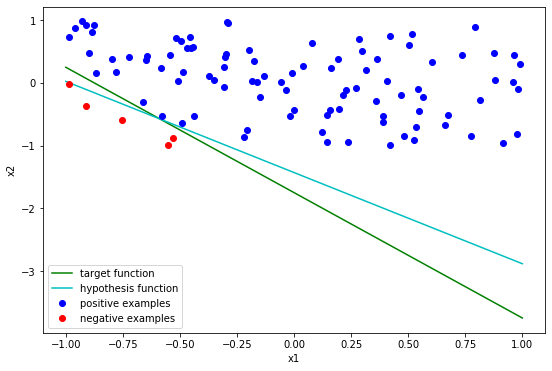

In [474]:
plt.rcParams["figure.figsize"] = (9,6)

# Plot the target function
X0 = [-1.0, 1.0]
Y0 = [target_function(i) for i in X0]
plt.plot(X0, Y0, 'g', label = 'target function')

# Plot the hypothesis function
Y_hypothesis3 = [hypothesis_function(i, W3) for i in X0]
plt.plot(X0, Y_hypothesis3, 'c', label = 'hypothesis function')

# Plot the third data set's points 
plt.plot(X3pos, Y3pos, 'bo', label = 'positive examples')
plt.plot(X3neg, Y3neg, 'ro', label = 'negative examples')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Task 5
Repeat everything in (2) with another randomly generated data set of size 1000. Compare
your results with (2).

In [475]:
# Fourth data set with size 1000

X4 = np.random.uniform(low=-1.0, high=1.0, size=(1000,3))
for x in X4:
    x[0] = 1.0
    
X4pos, X4neg, Y4pos, Y4neg, labels4 = [],[],[],[],[]
for x in X4:
    if target_function_activate(x) == 1:
        X4pos.append(x[1])
        Y4pos.append(x[2])
    else:
        X4neg.append(x[1])
        Y4neg.append(x[2])
    labels4.append(target_function_activate(x))

In [476]:
W4 = initialize_weights()
W4, number_of_updates4 = PLA(X4, W4, labels4)
print("Weights = ", W4)
print("Number of updates = ", number_of_updates4)

Weights =  [14.44420503 16.62560604  8.12746126]
Number of updates =  554


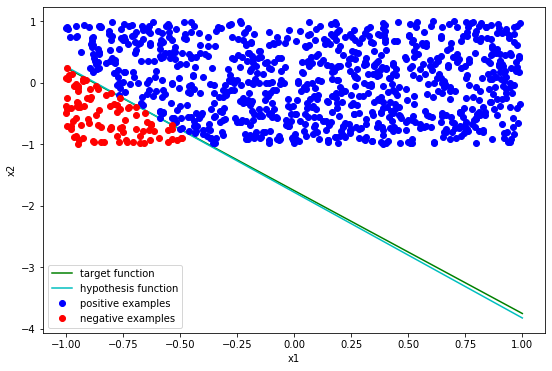

In [477]:
plt.rcParams["figure.figsize"] = (9,6)

# Plot the target function
X0 = [-1.0, 1.0]
Y0 = [target_function(i) for i in X0]
plt.plot(X0, Y0, 'g', label = 'target function')

# Plot the hypothesis function
Y_hypothesis4 = [hypothesis_function(i, W4) for i in X0]
plt.plot(X0, Y_hypothesis4, 'c', label = 'hypothesis function')

# Plot the fourth data set's points 
plt.plot(X4pos, Y4pos, 'bo', label = 'positive examples')
plt.plot(X4neg, Y4neg, 'ro', label = 'negative examples')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()